# Satander Customer Satisfaction 

https://www.kaggle.com/competitions/santander-customer-satisfaction/overview


The premise of my challenge was to predict and identify dissatified and unsatisfied customers in their banking experience. By doing so this will allow Santander bank to take the required steps to improve customer satisfaction. 

I was provided with three csv files "train, test and sample submission". My train data consisted of 371 feautures, a target column and consisted of 76,020 rows. The size of the data set was also 119.04 MB.
I identified that my datset was a binary classification problem and was a numerical dataset. 

# Dataloading and Initial look

In [67]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [68]:
#load data
df = pd.read_csv("train.csv")

In [69]:
#data set size
dataset_size = df.shape
print("Dataset Size:", dataset_size)

Dataset Size: (76020, 371)


In [70]:
#check for missing values
missing_data = df.isnull().sum()
# Check if there are any missing values
if missing_data.sum() > 0:
    print("Missing data found!")
    print(missing_data)
else:
    print("No missing data found.")

No missing data found.


In [71]:
# table of feautures
display(df)

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
0,1,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.170000,0
1,3,2,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.030000,0
2,4,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.770000,0
3,8,2,37,0.0,195.0,195.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64007.970000,0
4,10,2,39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76015,151829,2,48,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,60926.490000,0
76016,151830,2,39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,118634.520000,0
76017,151835,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,74028.150000,0
76018,151836,2,25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,84278.160000,0


* Based on the table, the feautres are numerical with the values ranging anywhere from (0-120,000?)

In [72]:
df.describe()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
count,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,...,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,7.602000e+04,76020.000000
mean,75964.050723,-1523.199277,33.212865,86.208265,72.363067,119.529632,3.559130,6.472698,0.412946,0.567352,...,7.935824,1.365146,12.215580,8.784074,31.505324,1.858575,76.026165,56.614351,1.172358e+05,0.039569
std,43781.947379,39033.462364,12.956486,1614.757313,339.315831,546.266294,93.155749,153.737066,30.604864,36.513513,...,455.887218,113.959637,783.207399,538.439211,2013.125393,147.786584,4040.337842,2852.579397,1.826646e+05,0.194945
min,1.000000,-999999.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.163750e+03,0.000000
25%,38104.750000,2.000000,23.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.787061e+04,0.000000
50%,76043.000000,2.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.064092e+05,0.000000
75%,113748.750000,2.000000,40.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.187563e+05,0.000000
max,151838.000000,238.000000,105.000000,210000.000000,12888.030000,21024.810000,8237.820000,11073.570000,6600.000000,6600.000000,...,50003.880000,20385.720000,138831.630000,91778.730000,438329.220000,24650.010000,681462.900000,397884.300000,2.203474e+07,1.000000


* Yes, i do see outliers, based on the means being so small compared to the max values. This indicated the max value could be an outlier. An outlier is an extreme value in the dataset

* There is definently a class imbalane in the data set with the data set leaning more towards the 0/1 ? Column

* The Target is encoded with 0s. and the Target column is the variable to predict

In [73]:
# any duplicates 
duplicates = df.duplicated().sum()
print("Number of Duplicates:", duplicates)

Number of Duplicates: 0


# Data Visualization


Number of category 0: 73012
Number of category 1: 3008


/usr/lib/python3/dist-packages/matplotlib/axes/_axes.py:6647: RuntimeWarning: invalid value encountered in divide
  tops = (tops / np.diff(bins)) / tops[-1].sum()
/usr/lib/python3/dist-packages/matplotlib/axes/_axes.py:6647: RuntimeWarning: invalid value encountered in divide
  tops = (tops / np.diff(bins)) / tops[-1].sum()
/usr/lib/python3/dist-packages/matplotlib/axes/_axes.py:6647: RuntimeWarning: invalid value encountered in divide
  tops = (tops / np.diff(bins)) / tops[-1].sum()
/usr/lib/python3/dist-packages/matplotlib/axes/_axes.py:6647: RuntimeWarning: invalid value encountered in divide
  tops = (tops / np.diff(bins)) / tops[-1].sum()


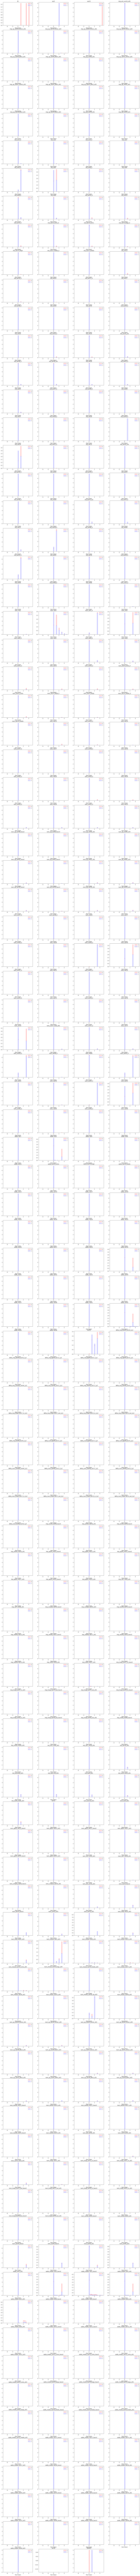

In [74]:
import math
import numpy as np
import matplotlib.pyplot as plt

def compare_features_binary(d, logscale=False):
    # Get the target variable
    target = d["TARGET"]

    # Check if the target variable is a column name or an array of target values
    if isinstance(target, str):
        # Assuming target is the column name
        df_0 = d["Training"][d["Training"][target] == 0]
        df_1 = d["Training"][d["Training"][target] == 1]
    else:
        # Assuming target is an array of target values
        df_0 = d["Training"].loc[target == 0]
        df_1 = d["Training"].loc[target == 1]

    print("Number of category 0:", df_0.shape[0])
    print("Number of category 1:", df_1.shape[0])

    # Calculate the number of features
    num_features = d["Training"].shape[1]

    # Calculate the number of plots per row
    num_plots_per_row = min(4, num_features)  # Maximum of 4 plots per row

    # Calculate the number of rows needed
    num_rows = math.ceil(num_features / num_plots_per_row)

    # Increase the size of individual plots
    plt.figure(figsize=(6* num_plots_per_row,  5* num_rows))

    # Plot histograms for raw outputs of each class
    for i, column in enumerate(df_0.columns):
        plt.subplot(num_rows, num_plots_per_row, i + 1)
        plt.title(column)
        if logscale:
            plt.yscale("log")
        plt.hist(df_0[column], bins=50, histtype="step", color="red", label="0", density=1, stacked=True, range = (-5,5))
        plt.hist(df_1[column], bins=50, histtype="step", color="blue", label="1", density=1, stacked=True, range = (-5,5))
        plt.legend()
        plt.xlabel("Raw Output")
        
    
    plt.show()


d = {"Training":df, "TARGET": "TARGET"}
compare_features_binary(d)


what feautres look more promising for machine learning algorithm ?? 

In [75]:
#calculate feautre precentages 
train_data = pd.read_csv('train.csv')

# Calculate the percentages of unsatisfied and satisfied customers
unsatisfied_percentage = (train_data['TARGET'].value_counts(normalize=True) * 100)[0]
satisfied_percentage = (train_data['TARGET'].value_counts(normalize=True) * 100)[1]

# display the percentages
percentage_df = pd.DataFrame({
    'Category': ['Unsatisfied', 'Satisfied'],
    'Percentage': [unsatisfied_percentage, satisfied_percentage]
})

# Display the DataFrame
print(percentage_df)


      Category  Percentage
0  Unsatisfied   96.043147
1    Satisfied    3.956853


# Data cleaning and preparation

* dropping unescarry columns (done in machine learning model)
* Performed One Hot encoding on categorical Variables 

In [158]:
columns_to_drop = ['ID', 'target']
X_train = X_train.drop(columns=columns_to_drop, errors='ignore')

# Identify categorical columns in the training dataset
categorical_columns = X_train.select_dtypes(include=['object']).columns  

# Perform one-hot encoding on the categorical columns
X_train_ = pd.get_dummies(X_train, columns=categorical_columns)

# Display the encoded DataFrame
display(X_train)

,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,imp_op_var40_ult1,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
20731,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,76041.960000,0
65772,2,51,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,94024.050000,0
45571,2,44,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,111306.990000,0
55900,2,57,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016,0
75618,2,61,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,97021.020000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37194,2,42,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,195450.930000,0
6265,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,84892.950000,0
54886,2,27,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,63733.770000,0
860,2,17,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,101492.340000,0


In [160]:
# Identify categorical columns in the test dataset
categorical_columns_test = test_df.select_dtypes(include=['object']).columns  

# Perform one-hot encoding on the categorical columns in the test dataset
X_test = pd.get_dummies(test_df, columns=categorical_columns_test)

# Drop specified columns if they exist
columns_to_drop = ['ID', 'target']
X_test = X_test.drop(columns=columns_to_drop, errors='ignore')

# Display the encoded DataFrame
display(X_test)

,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,imp_op_var40_ult1,...,saldo_medio_var29_ult3,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38
0,2,32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,40532.100000
1,2,35,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,45486.720000
2,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,46993.950000
3,2,24,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,187898.610000
4,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,73649.730000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75813,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,40243.200000
75814,2,26,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,146961.300000
75815,2,24,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,167299.770000
75816,2,40,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016


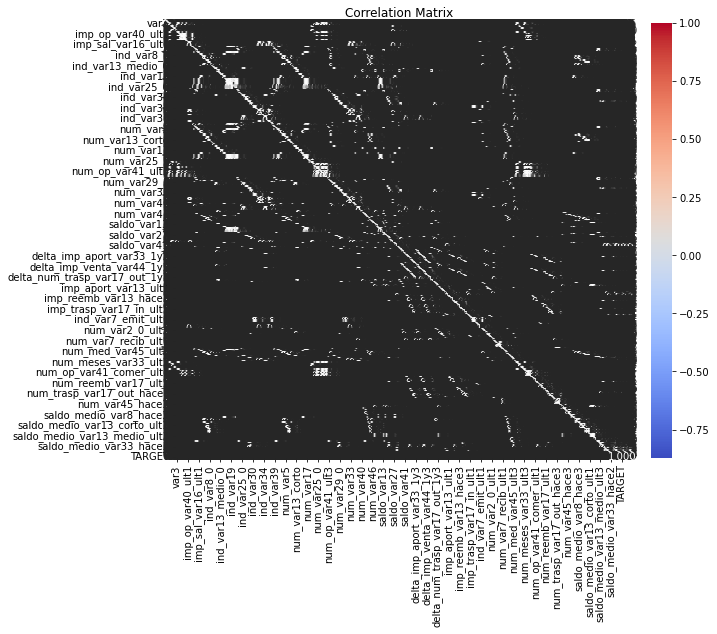

In [180]:
correlation_matrix = X_train.corr()

# Plotting the correlation matrix using Seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".3f", linewidths=.5)
plt.title('Correlation Matrix')
plt.show()

# Machine learning model

Train logistic regression Algorithm 

In [145]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, roc_auc_score

In [161]:
# Split the training data into training and validation sets
X_train_split, X_val_split, y_train_split, y_val_split = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# X_train_split and y_train_split will be your training set
# X_val_split and y_val_split will be your validation set

Number of category 0: 46728
Number of category 1: 1924


/usr/lib/python3/dist-packages/matplotlib/axes/_axes.py:6647: RuntimeWarning: invalid value encountered in divide
  tops = (tops / np.diff(bins)) / tops[-1].sum()
/usr/lib/python3/dist-packages/matplotlib/axes/_axes.py:6647: RuntimeWarning: invalid value encountered in divide
  tops = (tops / np.diff(bins)) / tops[-1].sum()
/usr/lib/python3/dist-packages/matplotlib/axes/_axes.py:6647: RuntimeWarning: invalid value encountered in divide
  tops = (tops / np.diff(bins)) / tops[-1].sum()


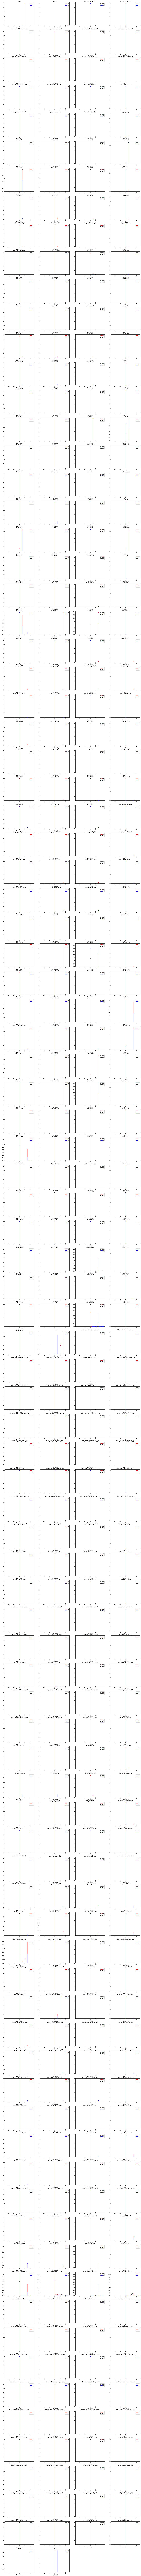

In [163]:
def compare_features_binary(d, logscale=False):
    # Split the training data into training and validation sets
    X_train_split, X_val_split, y_train_split, y_val_split = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

    # Get the target variable
    target = y_train_split

    # Check if the target variable is an array of target values
    if isinstance(target, str):
        # Assuming target is the column name
        df_0 = X_train_split[y_train_split == 0]
        df_1 = X_train_split[y_train_split == 1]
    else:
        # Assuming target is an array of target values
        df_0 = X_train_split.loc[y_train_split == 0]
        df_1 = X_train_split.loc[y_train_split == 1]

    print("Number of category 0:", df_0.shape[0])
    print("Number of category 1:", df_1.shape[0])

    # Calculate the number of features
    num_features = X_train_split.shape[1]

    # Calculate the number of plots per row
    num_plots_per_row = min(4, num_features)  # Maximum of 4 plots per row

    # Calculate the number of rows needed
    num_rows = math.ceil(num_features / num_plots_per_row)

    # Increase the size of individual plots
    plt.figure(figsize=(6* num_plots_per_row,  5* num_rows))

    # Plot histograms for raw outputs of each class
    for i, column in enumerate(df_0.columns):
        plt.subplot(num_rows, num_plots_per_row, i + 1)
        plt.title(column)
        if logscale:
            plt.yscale("log")
        plt.hist(df_0[column], bins=50, histtype="step", color="red", label="0", density=1, stacked=True, range=(-5, 5))
        plt.hist(df_1[column], bins=50, histtype="step", color="blue", label="1", density=1, stacked=True, range=(-5, 5))
        plt.legend()
        plt.xlabel("Raw Output")

    plt.show()
d = {"Training":df, "TARGET": "TARGET"}
compare_features_binary(d)

In [167]:
# Create a Decision Tree Classifier
clf = DecisionTreeClassifier(class_weight = 'balanced')

In [168]:
# Train the classifier using the training data
clf.fit(X_train_split, y_train_split)

DecisionTreeClassifier(class_weight='balanced')

In [169]:
# Make predictions on the validation data
y_val_pred = clf.predict(X_val_split)

In [170]:
accuracy = accuracy_score(y_val_split, y_val_pred)
print("Validation Accuracy:", accuracy)

Validation Accuracy: 1.0


In [171]:
fpr, tpr, thresholds = roc_curve(y_val_split, y_val_pred)

In [172]:
roc_auc = roc_auc_score(y_val_split, y_val_pred)
print("ROC AUC Score:", roc_auc)

ROC AUC Score: 1.0


In [173]:
import sklearn.discriminant_analysis as DA
Fisher = DA.LinearDiscriminantAnalysis()

In [174]:
Fisher.fit(X_train, y_train)

LinearDiscriminantAnalysis()

In [175]:
Fisher.predict(X_val.to_numpy())

/home/randolpwanjiru/.local/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearDiscriminantAnalysis was fitted with feature names
  warnings.warn(


array([0, 0, 0, ..., 0, 0, 0])

/home/randolpwanjiru/.local/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearDiscriminantAnalysis was fitted with feature names
  warnings.warn(
/home/randolpwanjiru/.local/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearDiscriminantAnalysis was fitted with feature names
  warnings.warn(


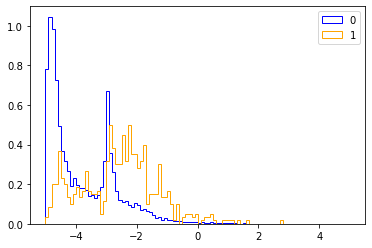

In [176]:
X_val_0 = X_val[y_val.to_numpy() == 0]  
X_val_1 = X_val[y_val.to_numpy() == 1]

plt.figure()

plt.hist(Fisher.decision_function(X_val_0.to_numpy()), bins=100, histtype="step", color="blue", label="0", stacked=True, density =1, range = (-5,5))

plt.hist(Fisher.decision_function(X_val_1.to_numpy()), bins=100, histtype="step", color="orange", label="1", stacked=True, density =1, range = (-5,5))

plt.legend(loc='upper right')

plt.show()


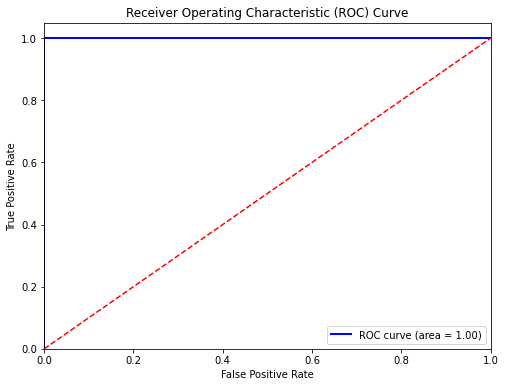

In [177]:
# Create ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

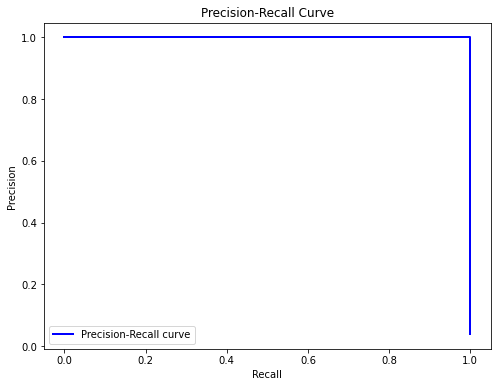

In [178]:
from sklearn.metrics import precision_recall_curve
precision, recall, _ = precision_recall_curve(y_val_split, y_val_pred)

# Plot the precision-recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='blue', lw=2, label='Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower left")
plt.show()